library



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

reading dataset


In [ ]:
df = pd.read_csv("/content/loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print(df.shape)

(614, 13)


data exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [ ]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education',
                        'Self_Employed','Property_Area','Credit_History']
continuous_features = ['ApplicantIncome', 'CoapplicantIncome',
                       'LoanAmount', 'Loan_Amount_Term']

categorial variable

loan id

In [ ]:
df.Loan_ID.value_counts(dropna=False)

,count
Loan_ID,
LP002990,1
LP001002,1
LP001003,1
LP001005,1
LP001006,1
...,...
LP001024,1
LP001020,1
LP001018,1


gender

In [ ]:
df.Gender.value_counts(dropna=False)

,count
Gender,
Male,489
Female,112
NaN,13


/tmp/ipython-input-333559254.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="hls")


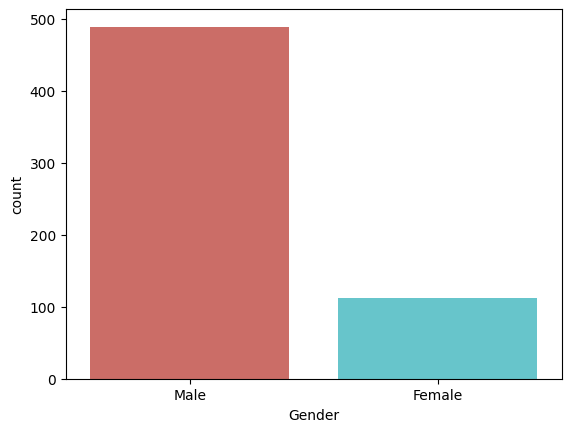

In [ ]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()


In [ ]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


married

In [ ]:
df.Married.value_counts(dropna=False)

,count
Married,
Yes,398
No,213
NaN,3


/tmp/ipython-input-3626669607.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Married", data=df, palette="Paired")


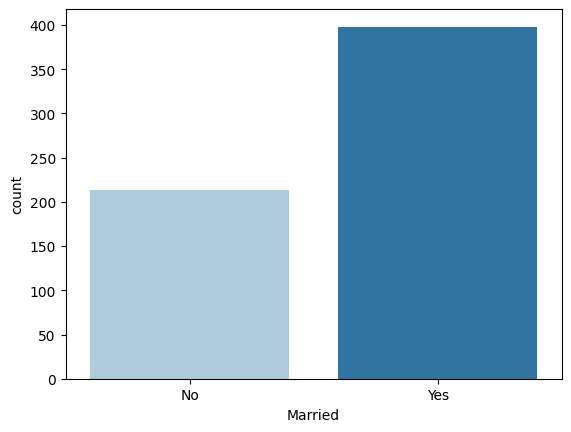

In [ ]:
sns.countplot(x="Married", data=df, palette="Paired")
plt.show()

In [ ]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


education

In [ ]:
df.Education.value_counts(dropna=False)

,count
Education,
Graduate,480
Not Graduate,134


/tmp/ipython-input-2317722563.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Education", data=df, palette="rocket")


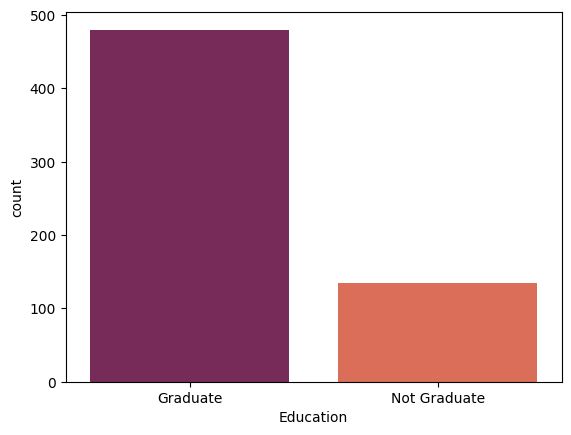

In [ ]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()


In [ ]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%
Missing values percentage: 0.00%


self employed

In [ ]:
df.Self_Employed.value_counts(dropna=False)

,count
Self_Employed,
No,500
Yes,82
NaN,32


/tmp/ipython-input-1963651902.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Self_Employed", data=df, palette="crest")


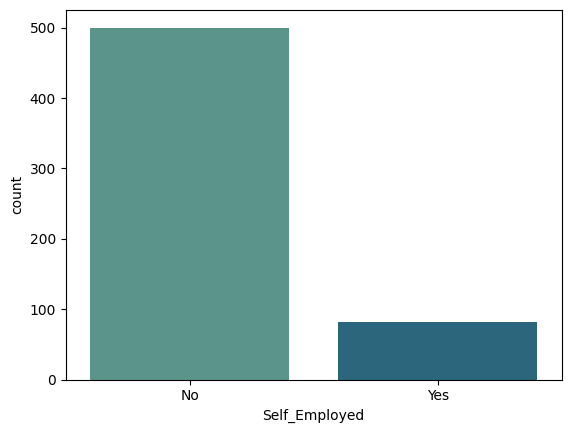

In [ ]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

In [ ]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


credit score

In [ ]:

df.Credit_History.value_counts(dropna=False)

,count
Credit_History,
1.0,475
0.0,89
NaN,50


/tmp/ipython-input-261100619.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_History", data=df, palette="viridis")


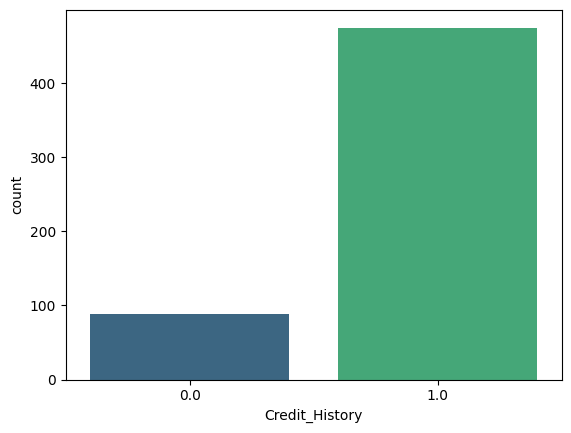

In [ ]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

In [ ]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


property area

In [ ]:
df.Property_Area.value_counts(dropna=False)

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


/tmp/ipython-input-1765907190.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Property_Area", data=df, palette="cubehelix")


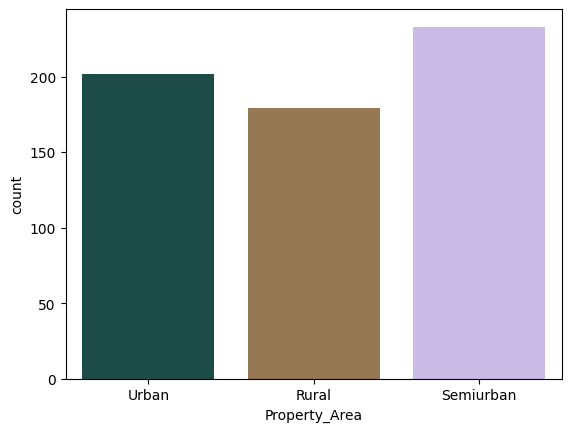

In [ ]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()

In [ ]:
countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNull = len(df[df.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%
Missing values percentage: 0.00%


loan status

In [ ]:
df.Loan_Status.value_counts(dropna=False)

,count
Loan_Status,
Y,422
N,192


/tmp/ipython-input-1110804027.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")


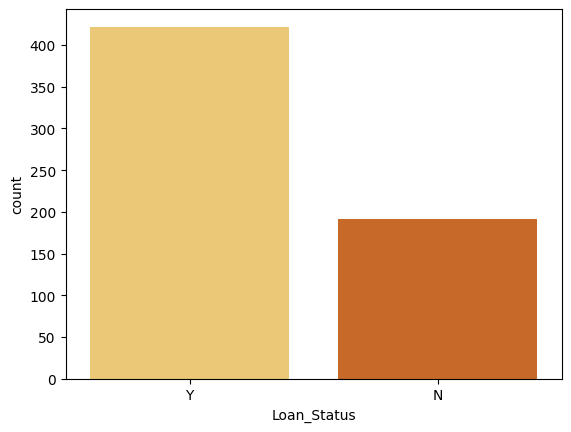

In [ ]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In [ ]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


loan amount team

In [ ]:
df.Loan_Amount_Term.value_counts(dropna=False)

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
NaN,14
300.0,13
84.0,4
240.0,4
120.0,3
60.0,2


/tmp/ipython-input-32458805.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")


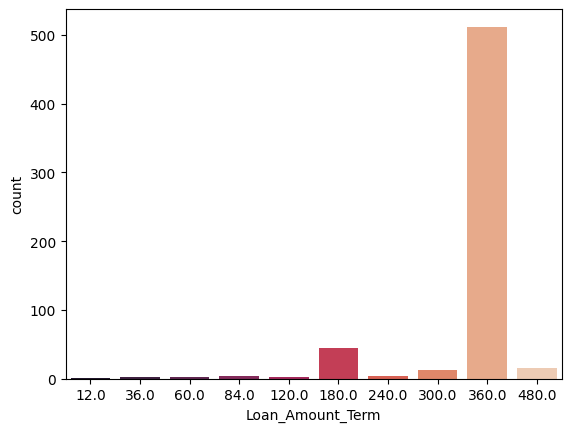

In [ ]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
plt.show()

In [ ]:
count12 = len(df[df.Loan_Amount_Term == 12.0])
count36 = len(df[df.Loan_Amount_Term == 36.0])
count60 = len(df[df.Loan_Amount_Term == 60.0])
count84 = len(df[df.Loan_Amount_Term == 84.0])
count120 = len(df[df.Loan_Amount_Term == 120.0])
count180 = len(df[df.Loan_Amount_Term == 180.0])
count240 = len(df[df.Loan_Amount_Term == 240.0])
count300 = len(df[df.Loan_Amount_Term == 300.0])
count360 = len(df[df.Loan_Amount_Term == 360.0])
count480 = len(df[df.Loan_Amount_Term == 480.0])
countNull = len(df[df.Loan_Amount_Term.isnull()])

print("Percentage of 12: {:.2f}%".format((count12 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(df.Loan_Amount_Term))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Amount_Term))*100)))

Percentage of 12: 0.16%
Percentage of 36: 0.33%
Percentage of 60: 0.33%
Percentage of 84: 0.65%
Percentage of 120: 0.49%
Percentage of 180: 7.17%
Percentage of 240: 0.65%
Percentage of 300: 2.12%
Percentage of 360: 83.39%
Percentage of 480: 2.44%
Missing values percentage: 2.28%


In [ ]:
result_df = pd.DataFrame(columns=['Features', 'Category', 'Count'])

for col in categorical_features:
    # Get the value counts for the column
    value_counts = df[col].value_counts().reset_index()
    value_counts.columns = ['Category', 'Count']
    value_counts['Features'] = col
    result_df = pd.concat([result_df, value_counts], ignore_index=True)

# Display the result
grouped_df = result_df.groupby('Features').agg({'Category': list, 'Count': list})
grouped_df

,Category,Count
Features,,
Credit_History,"[1.0, 0.0]","[475, 89]"
Dependents,"[0, 1, 2, 3+]","[345, 102, 101, 51]"
Education,"[Graduate, Not Graduate]","[480, 134]"
Gender,"[Male, Female]","[489, 112]"
Married,"[Yes, No]","[398, 213]"
Property_Area,"[Semiurban, Urban, Rural]","[233, 202, 179]"
Self_Employed,"[No, Yes]","[500, 82]"


numerical variable

In [ ]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


histogram

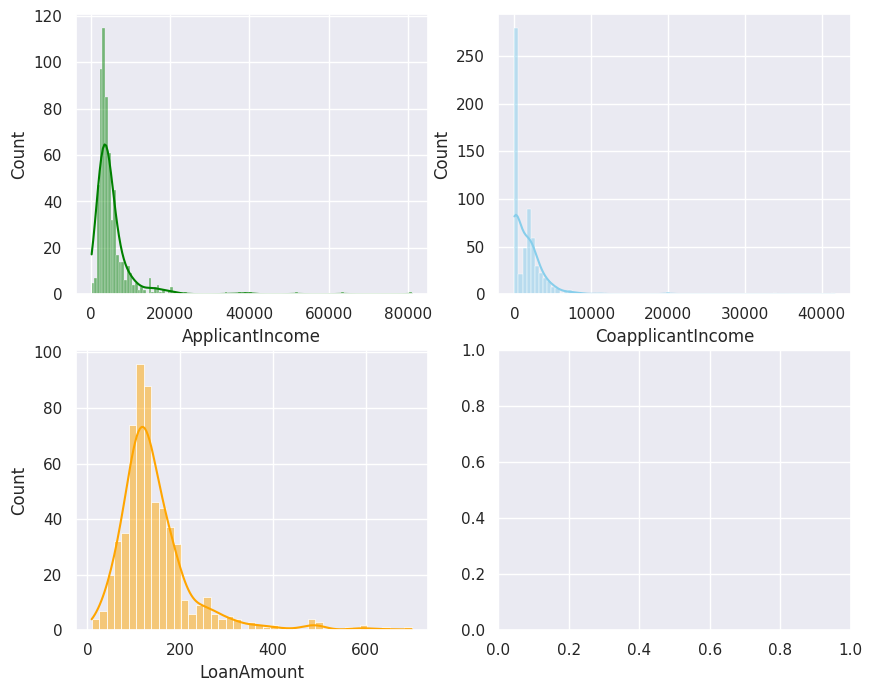

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

violin plot

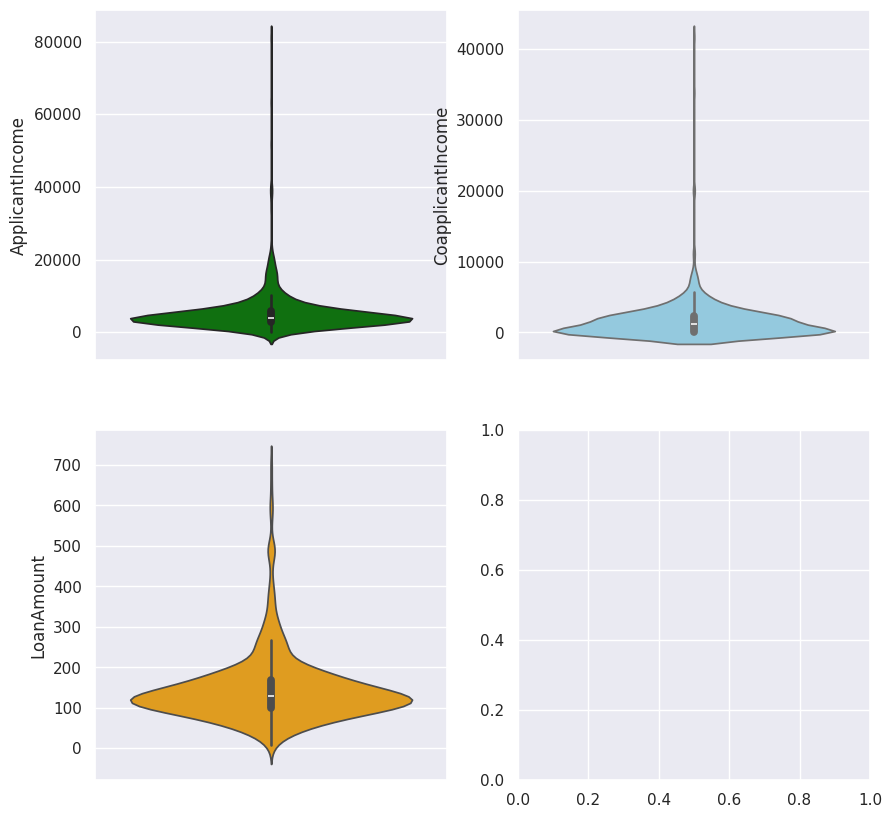

In [ ]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

Other Exploration

Heatmap

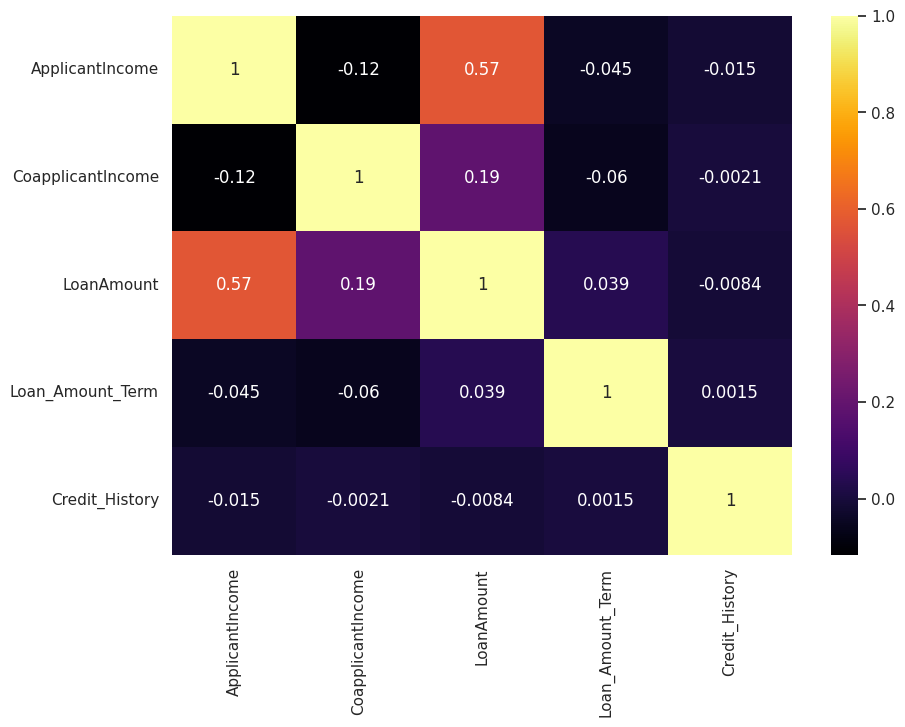

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.drop('Loan_ID', axis=1).corr(numeric_only=True), annot=True, cmap='inferno');

Categorical

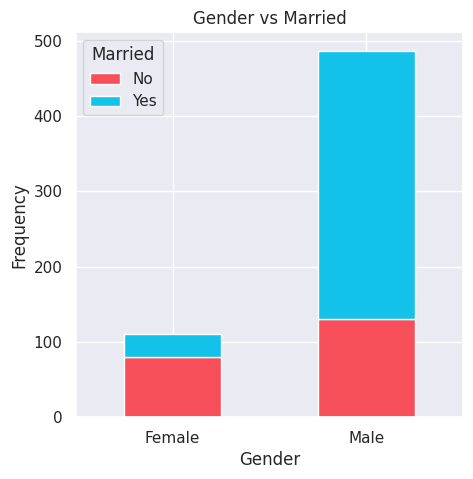

In [ ]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

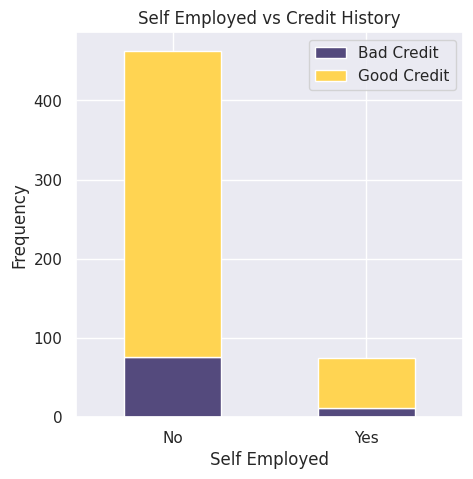

In [ ]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

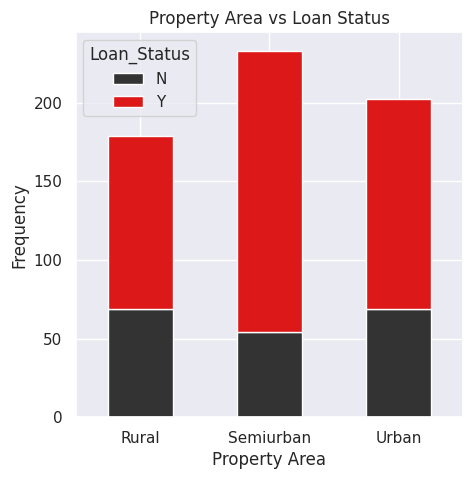

In [ ]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Categorical Numerical

/tmp/ipython-input-1139030696.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");


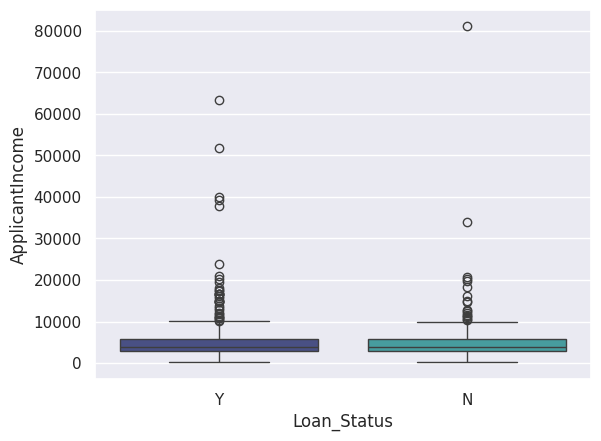

In [ ]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

/tmp/ipython-input-3243319138.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");


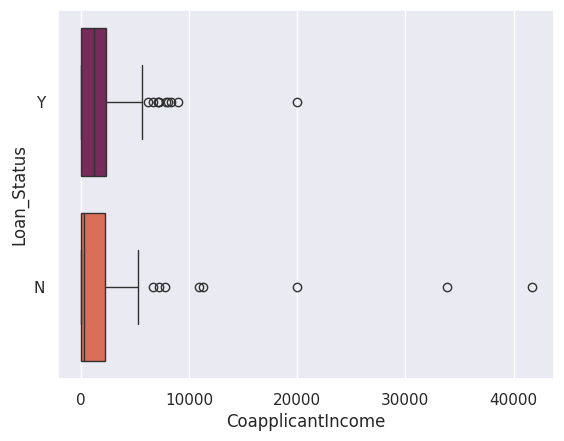

In [ ]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");

/tmp/ipython-input-2807477037.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");


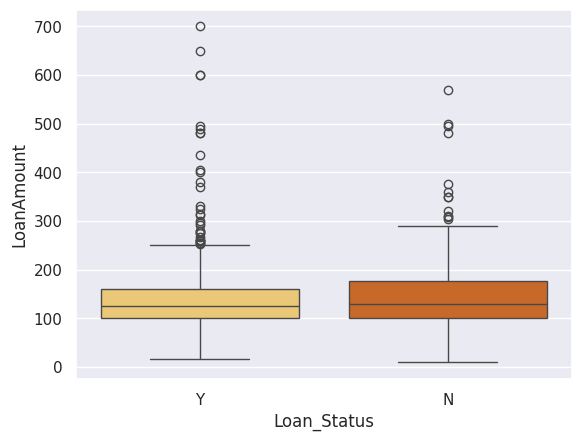

In [ ]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");

Numerical Numerical

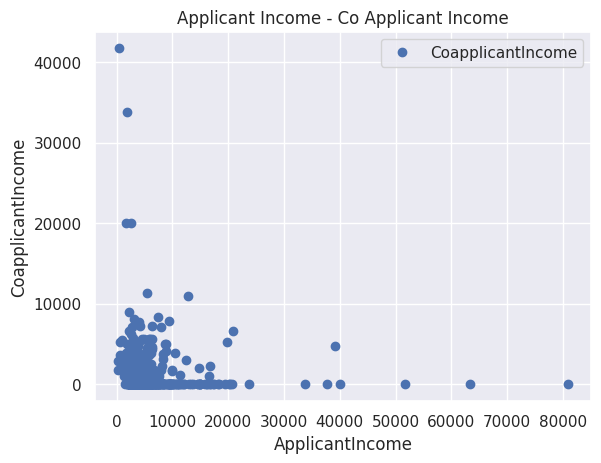

Pearson correlation: -0.11660458122889966
T Test and P value: 
 TtestResult(statistic=np.float64(13.835753259915665), pvalue=np.float64(1.460983948423972e-40), df=np.float64(1226.0))


In [ ]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')
plt.title('Applicant Income - Co Applicant Income')
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.show()
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

null values

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


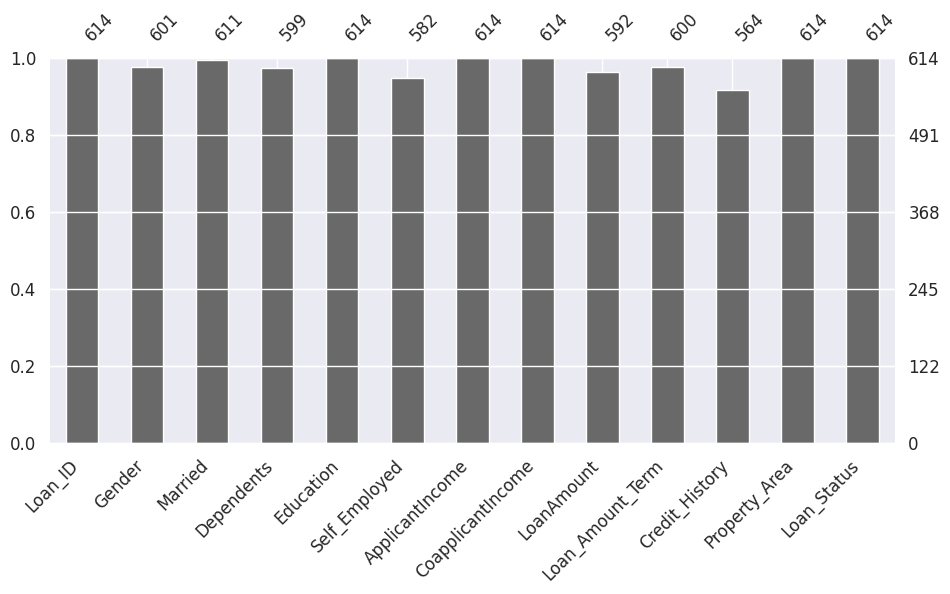

In [ ]:
plt.figure(figsize = (24, 5))
axz = plt.subplot(1,2,2)
mso.bar(df, ax = axz, fontsize = 12);

In [ ]:
def find_rows_with_high_null_values(df):
    threshold = 0.5
    # Getting DataFrame Name
    df_name = [name for name in globals() if globals()[name] is df][0]
    null_threshold = int(threshold * len(df.columns))
    null_rows = df[df.apply(lambda x: x.isnull().sum(), axis=1) >= null_threshold]
    num_null_rows = len(null_rows)
    print(f"The number of rows consisting of more than 50% missing values in {df_name} is: {num_null_rows}")

# Example usage:
find_rows_with_high_null_values(df)

The number of rows consisting of more than 50% missing values in df is: 0


Data Preprocessing

Drop Unecessary Variables

In [ ]:
df = df.drop(['Loan_ID'], axis = 1)

Drop Duplicates

In [ ]:
print(f'Shape of Loan Dataset before drop duplicated Row is: {df.shape}')
df = df.drop_duplicates()
print(f'Shape of Loan Dataset After Drop Duplicated Row is: {df.shape}')

Shape of Loan Dataset before drop duplicated Row is: (614, 12)
Shape of Loan Dataset After Drop Duplicated Row is: (614, 12)


Data Imputation

Categorical Variables

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

/tmp/ipython-input-3023607144.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
/tmp/ipython-input-3023607144.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

Numerical Variables

In [ ]:

df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

/tmp/ipython-input-3092408858.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)


One-hot Encoding

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


Handle Nominal Feature

In [ ]:
Nominal_fetaures = ['Gender', 'Married','Education', 'Self_Employed', 'Property_Area']

In [ ]:
def encode_categorical_features(df, cols):

    for col in cols:
        dummies = pd.get_dummies(df[col], dtype=int, prefix=col)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(labels=col, axis=1)
    return df

# Encode the categorical features in the training and test sets
df = encode_categorical_features(df, Nominal_fetaures)
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.412162,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
1,1,4583,1508.0,128.000000,360.0,1.0,N,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66.000000,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120.000000,360.0,1.0,Y,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141.000000,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1



Handle Ordinal Feature

In [ ]:
encoder = {'0': 1/4, '1': 2/4, '2': 3/4, '3+': 4/4}
df["Dependents"] = df['Dependents'].map(encoder)

df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.25,5849,0.0,146.412162,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
1,0.50,4583,1508.0,128.000000,360.0,1.0,N,0,1,0,1,1,0,1,0,1,0,0
2,0.25,3000,0.0,66.000000,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
3,0.25,2583,2358.0,120.000000,360.0,1.0,Y,0,1,0,1,0,1,1,0,0,0,1
4,0.25,6000,0.0,141.000000,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1


In [ ]:
mapping = {'Y': 1,'N': 0}
df["Loan_Status"] = df['Loan_Status'].map(mapping)

df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.25,5849,0.0,146.412162,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1
1,0.50,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,1,1,0,1,0,1,0,0
2,0.25,3000,0.0,66.000000,360.0,1.0,1,0,1,0,1,1,0,0,1,0,0,1
3,0.25,2583,2358.0,120.000000,360.0,1.0,1,0,1,0,1,0,1,1,0,0,0,1
4,0.25,6000,0.0,141.000000,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1


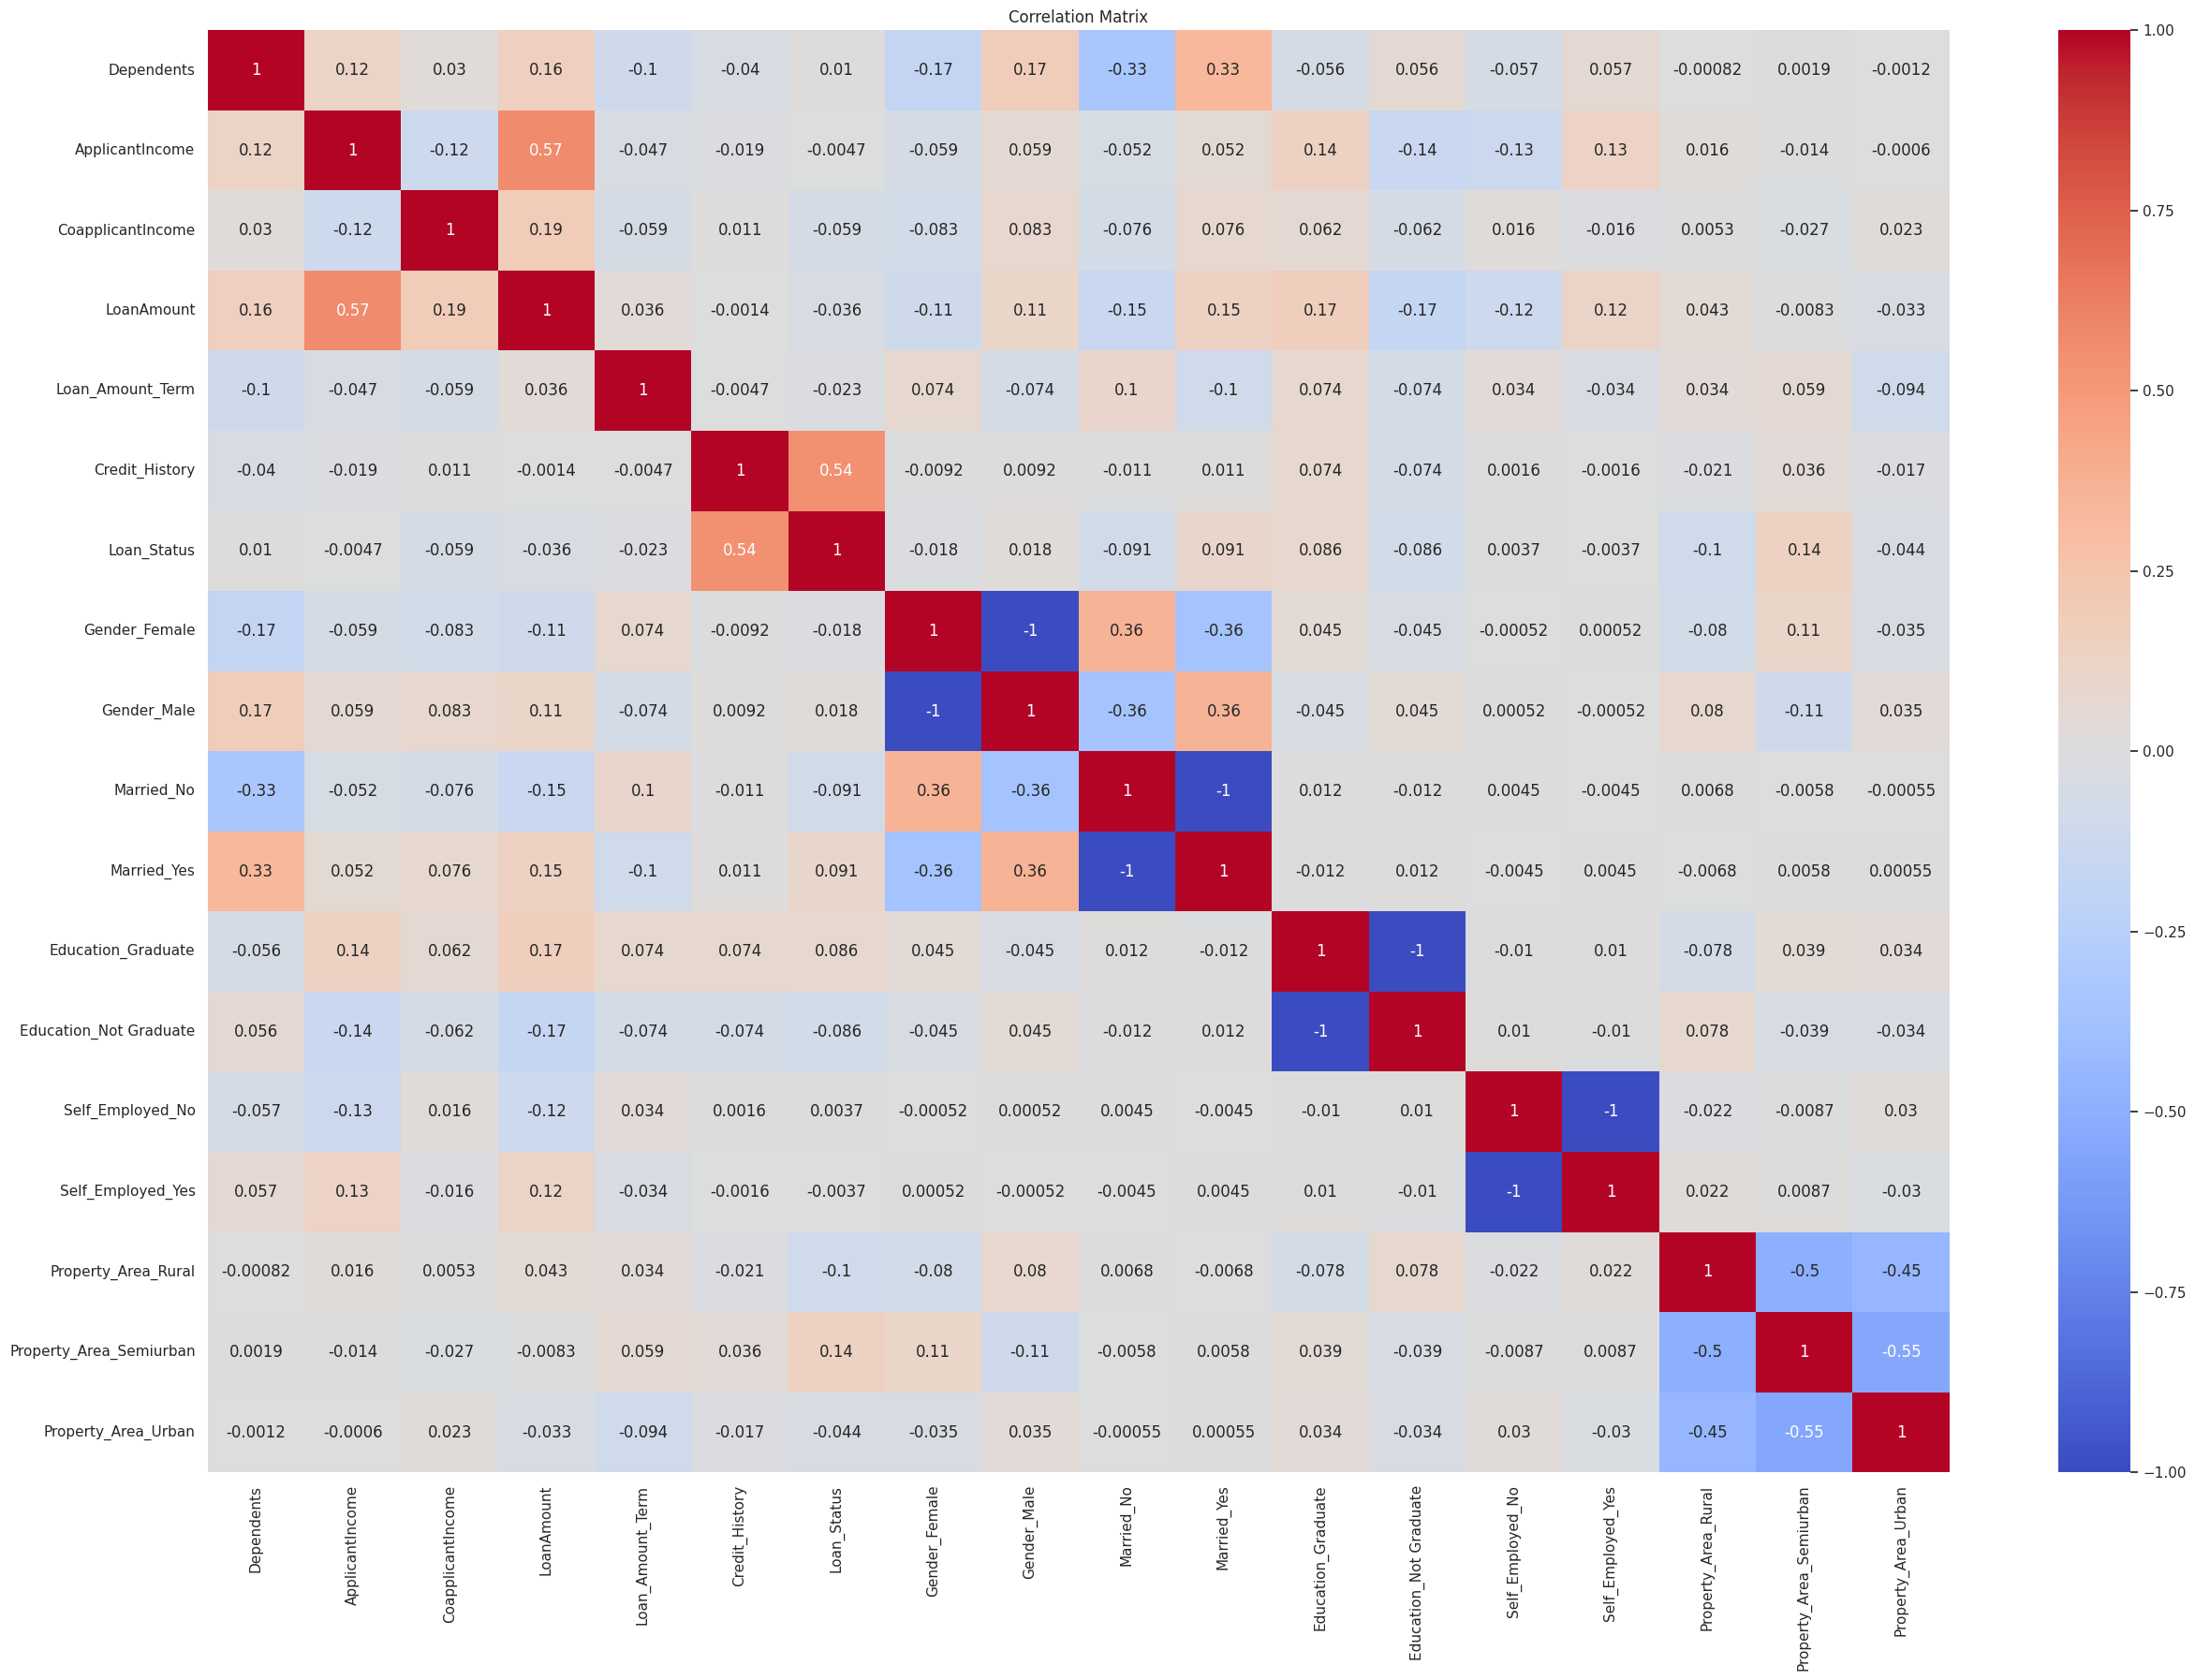

In [ ]:
corr_matrix =df.corr()
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

Remove Outliers & Infinite values

In [ ]:
df.shape

(614, 18)

Skewed Distribution Treatment

In [ ]:
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

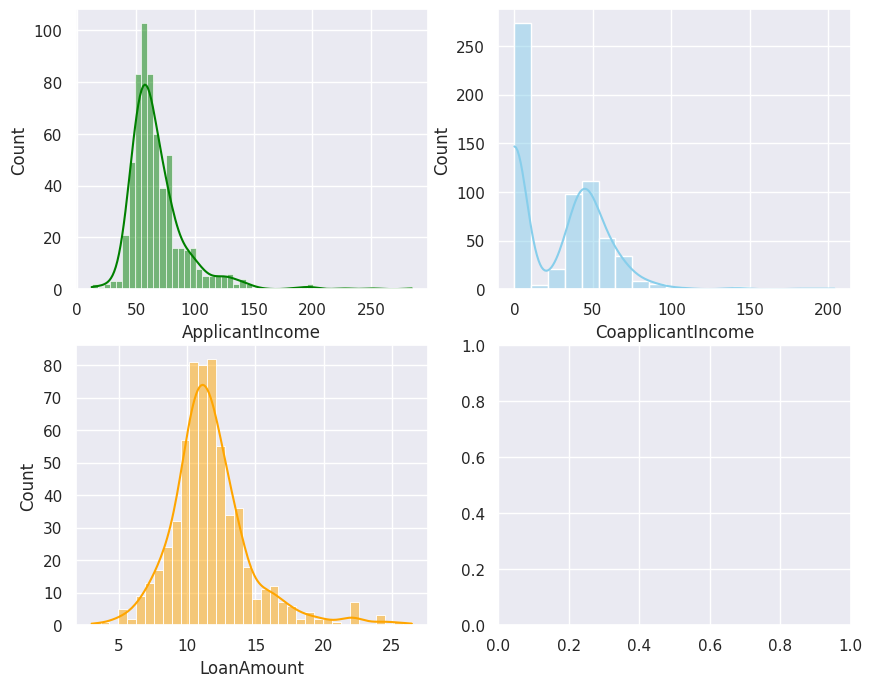

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

Features Separating

In [ ]:
df.shape

(614, 18)

/tmp/ipython-input-2714415630.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, data=X, palette="coolwarm")


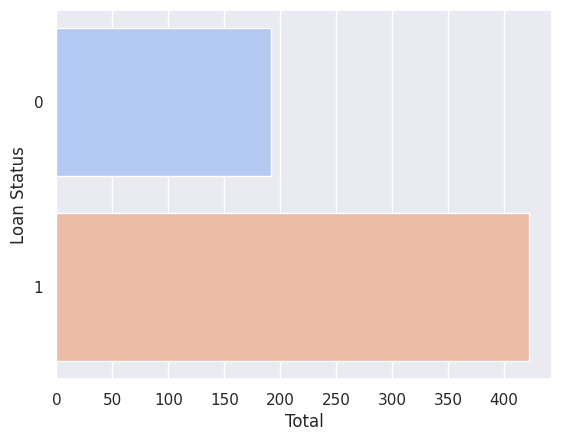

In [ ]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=X, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()


In [ ]:

X.shape

(614, 17)

SMOTE Technique

/tmp/ipython-input-695642574.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, data=X, palette="coolwarm")


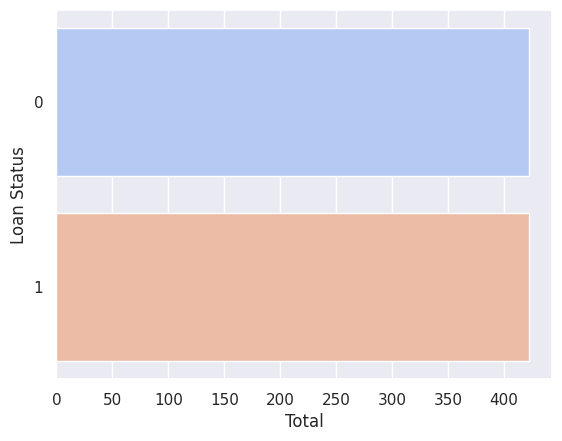

In [ ]:
X, y = SMOTE().fit_resample(X, y)
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=X, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [ ]:
X.shape

(844, 17)

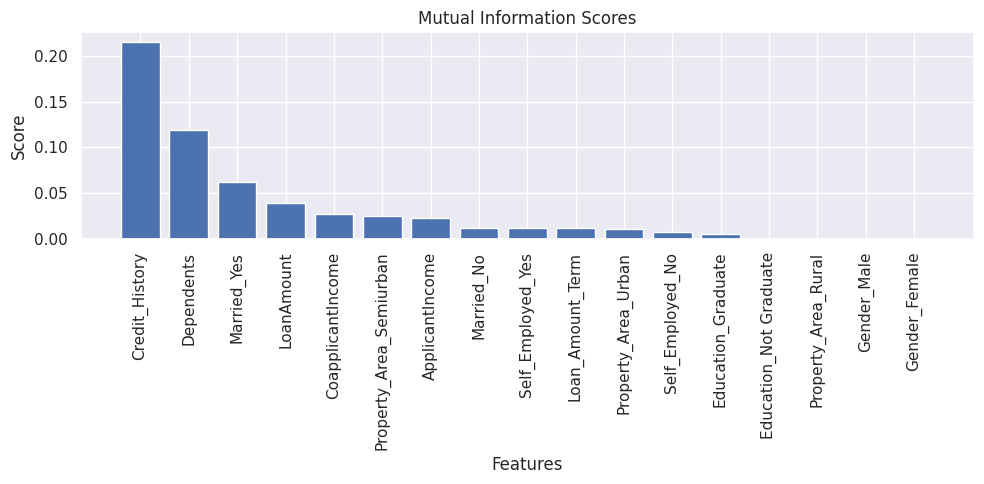

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# Mutual Information
# Mutual Information
feature_names = X.columns
scores = mutual_info_classif(X, y)

# Create an array of indices for sorting the scores and feature names
indices = np.argsort(scores)[::-1]

# Sort the scores and feature names based on the indices
sorted_scores = scores[indices]
sorted_feature_names = [feature_names[i] for i in indices]

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(len(sorted_scores)), sorted_scores)
plt.xticks(range(len(sorted_scores)), sorted_feature_names, rotation='vertical')
plt.title("Mutual Information Scores")
plt.xlabel("Features")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

In [ ]:
drop_fetaures=[]


mi_scores = sorted(zip(feature_names, scores), key=lambda x: x[1], reverse=True)

for feature, score in mi_scores:
    print(f"{feature}: {score:.4f}")
    if score<0.001:
        print(f"Dropping The Feature{feature}")
        drop_fetaures.append(feature)

drop_fetaures

Credit_History: 0.2155
Dependents: 0.1194
Married_Yes: 0.0623
LoanAmount: 0.0387
CoapplicantIncome: 0.0274
Property_Area_Semiurban: 0.0244
ApplicantIncome: 0.0224
Married_No: 0.0120
Self_Employed_Yes: 0.0119
Loan_Amount_Term: 0.0119
Property_Area_Urban: 0.0108
Self_Employed_No: 0.0076
Education_Graduate: 0.0050
Gender_Female: 0.0000
Dropping The FeatureGender_Female
Gender_Male: 0.0000
Dropping The FeatureGender_Male
Education_Not Graduate: 0.0000
Dropping The FeatureEducation_Not Graduate
Property_Area_Rural: 0.0000
Dropping The FeatureProperty_Area_Rural


['Gender_Female',
 'Gender_Male',
 'Education_Not Graduate',
 'Property_Area_Rural']

In [ ]:
def Dropping(df, cols):

    for col in cols:
        df = df.drop(labels=col, axis=1)
    return df

X_update = Dropping(X, drop_fetaures)

In [ ]:
X_update.shape

(844, 13)

 Data Normalization

In [ ]:
X_scaled= MinMaxScaler().fit_transform(X_update)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2,
                                                    random_state = 0)
X_train.shape,y_train.shape


((675, 13), (675,))

In [ ]:
X_test.shape,y_test.shape

((169, 13), (169,))

Models

 Logistic Regression

In [ ]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.88      0.65      0.75        86
           1       0.71      0.90      0.80        83

    accuracy                           0.78       169
   macro avg       0.79      0.78      0.77       169
weighted avg       0.80      0.78      0.77       169

[[56 30]
 [ 8 75]]
LR accuracy: 77.51%


K-Nearest Neighbour (KNN)

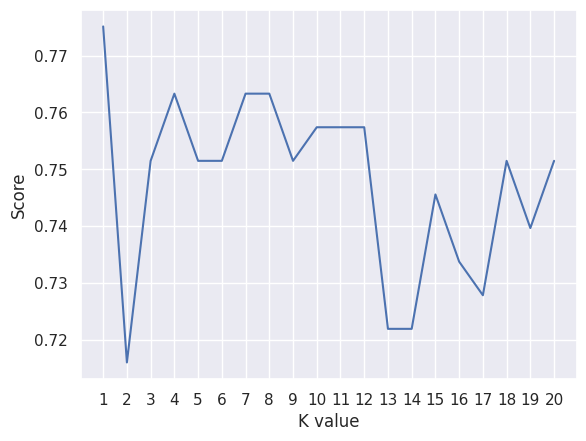

KNN best accuracy: 77.51%


In [ ]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

Support Vector Machine (SVM)

In [ ]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.94      0.55      0.69        86
           1       0.67      0.96      0.79        83

    accuracy                           0.75       169
   macro avg       0.81      0.76      0.74       169
weighted avg       0.81      0.75      0.74       169

[[47 39]
 [ 3 80]]
SVC accuracy: 75.15%


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Naive Bayes

Categorical NB

In [ ]:
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.96      0.64      0.77        86
           1       0.72      0.98      0.83        83

    accuracy                           0.80       169
   macro avg       0.84      0.81      0.80       169
weighted avg       0.85      0.80      0.80       169

[[55 31]
 [ 2 81]]
Categorical Naive Bayes accuracy: 80.47%


Gaussian NB

In [ ]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.93      0.59      0.72        86
           1       0.69      0.95      0.80        83

    accuracy                           0.77       169
   macro avg       0.81      0.77      0.76       169
weighted avg       0.81      0.77      0.76       169

[[51 35]
 [ 4 79]]
Gaussian Naive Bayes accuracy: 76.92%


Decision Tree

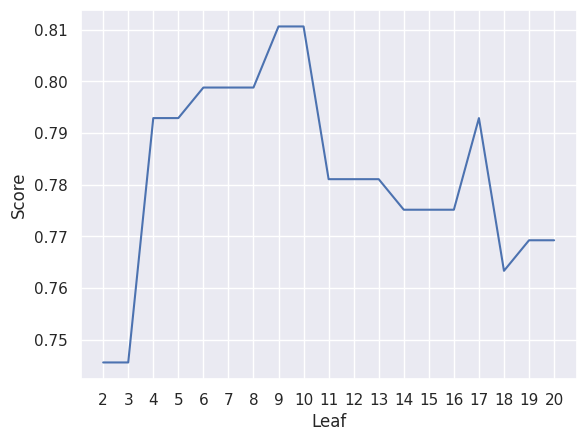

Decision Tree Accuracy: 81.07%


In [ ]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))

plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

Random Forest

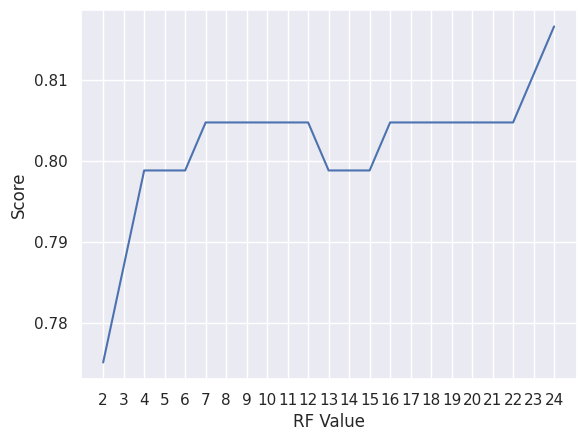

Random Forest Accuracy:  81.66%


In [ ]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))


Gradient Boosting

In [ ]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [ ]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [ ]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=2, max_leaf_nodes=30, n_estimators=300,
                           subsample=0.5)
0.8370320855614974
{'subsample': 0.5, 'n_estimators': 300, 'max_leaf_nodes': 30, 'max_depth': 2}
6


In [ ]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        86
           1       0.76      0.92      0.83        83

    accuracy                           0.82       169
   macro avg       0.83      0.82      0.82       169
weighted avg       0.83      0.82      0.82       169

[[62 24]
 [ 7 76]]
Gradient Boosting accuracy: 81.66%


Model Comparison

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors',
                                  'SVM', 'Categorical NB',
                                  'Gaussian NB', 'Decision Tree',
                                  'Random Forest', 'Gradient Boost'],
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100,
                                     NBAcc1*100, NBAcc2*100, DTAcc*100,
                                     RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy
6,Random Forest,81.656805
7,Gradient Boost,81.656805
5,Decision Tree,81.065089
3,Categorical NB,80.473373
0,Logistic Regression,77.514793
1,K Neighbors,77.514793
4,Gaussian NB,76.923077
2,SVM,75.147929


Let's see the feature importance

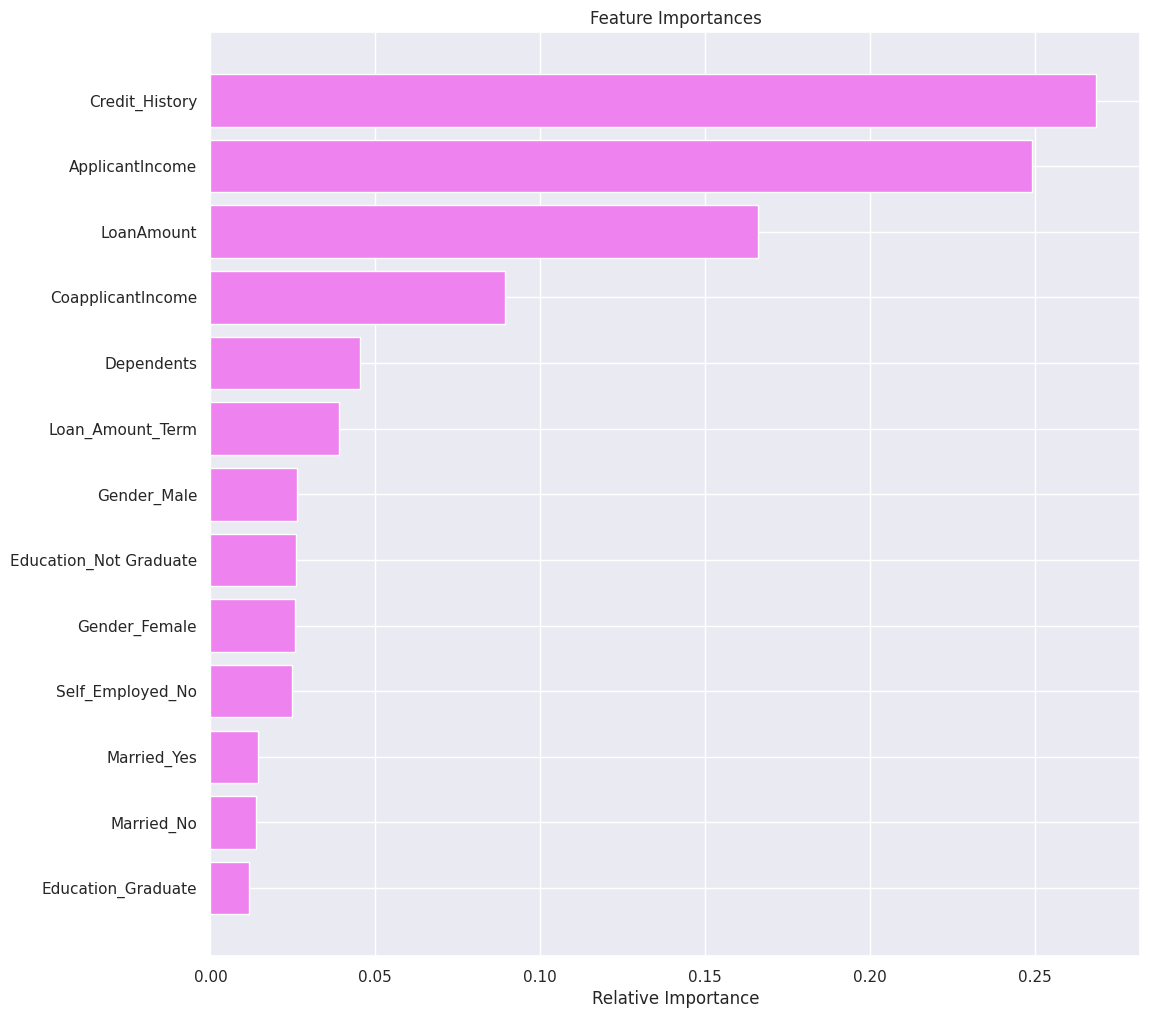

In [ ]:
feature_names = X.columns
importances = GBclassifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


Lookind For Neural network??

In [ ]:
import keras
from keras import backend as K
from keras.models import Sequential
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras import regularizers

from keras.layers import Dense
from keras.metrics import categorical_crossentropy

In [ ]:
n_inputs = X_train.shape[1]

model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 13)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 696 (2.72 KB)

 Trainable params: 696 (2.72 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=25,
          epochs=150, shuffle=True, verbose=1)

Epoch 1/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4778 - loss: 0.8125 - val_accuracy: 0.3728 - val_loss: 0.7279
Epoch 2/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5077 - loss: 0.6986 - val_accuracy: 0.4497 - val_loss: 0.6994
Epoch 3/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5516 - loss: 0.6723 - val_accuracy: 0.4970 - val_loss: 0.6780
Epoch 4/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5999 - loss: 0.6556 - val_accuracy: 0.5444 - val_loss: 0.6593
Epoch 5/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7005 - loss: 0.6255 - val_accuracy: 0.6391 - val_loss: 0.6386
Epoch 6/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6879 - loss: 0.6106 - val_accuracy: 0.6864 - val_loss: 0.6193
Epoch 7/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7483 - loss: 0.5788 - val_accuracy: 0.6982 - val_loss: 0.5907
Epoch 8/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7635 - loss: 0.5469 - val_accuracy: 0.7

In [ ]:

predictions = model.predict(X_test, batch_size=200, verbose=0)

In [ ]:
#Get predicted probabilities for all classes
y_pred_prob = model.predict(X_test)

# Pick the class with highest probability
y_pred = np.argmax(y_pred_prob, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 


In [ ]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[57 29]
 [ 9 74]]
Confusion matrix, without normalization
[[86  0]
 [ 0 83]]


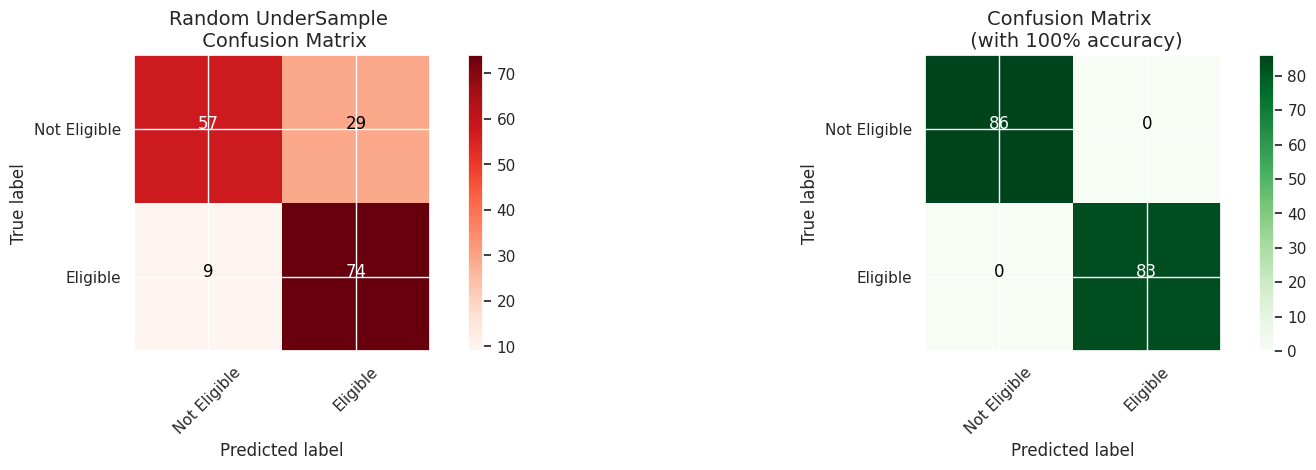

In [ ]:
pred_cm = confusion_matrix(y_test, y_pred)
actual_cm = confusion_matrix(y_test, y_test)
labels = ['Not Eligible', 'Eligible']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(pred_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)